In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from src.knearestneighbors import KNN
from src.logisticregression import LogisticRegression
import time
from tqdm import tqdm
import os

In [2]:
fig_path = os.path.join(os.getcwd(), 'figs')
os.makedirs(fig_path, exist_ok=True)

In [22]:
D = []
with open('data/D2z.txt', 'r') as f:
    for line in f.readlines():
        line = line.strip()
        D.append([float(num) for num in line.split(" ")])

D = np.array(D)

In [23]:
one_nn = KNN(D, k=1)

In [24]:
x = np.arange(-2, 2.1, 0.1)
X, Y = np.meshgrid(x, x)
X, Y = X.flatten().reshape(-1, 1), Y.flatten().reshape(-1, 1)
Z_0 = np.hstack((X, Y))
one_nn.predict(Z_0)
Z = one_nn.predictions.reshape(-1, 1)
Z = [X, Y, Z]
Z = np.hstack(Z)

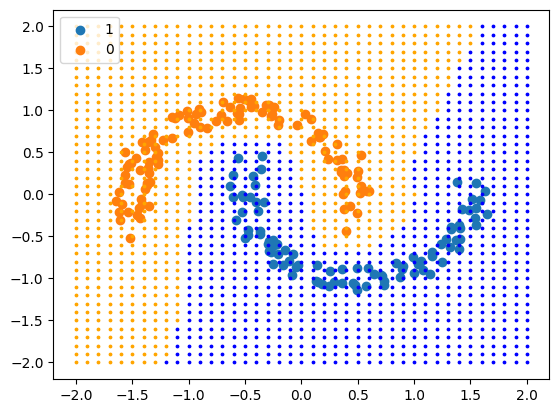

In [25]:
fig, ax = plt.subplots()
mask = (D[:, 2] == 0)
ax.scatter(D[mask, 0], D[mask, 1], label=1)
ax.scatter(D[~mask, 0], D[~mask, 1], label=0)

mask = (Z[:, 2] == 0)
ax.scatter(Z[mask, 0], Z[mask, 1], s=3, color='b')
ax.scatter(Z[~mask, 0], Z[~mask, 1], s=3, color='orange')
ax.legend(loc='upper left')

save_name = os.path.join(fig_path, 'p2_1.jpeg')
plt.savefig(save_name)

In [3]:
df = pd.read_csv('data/emails.csv')

In [4]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# normalize the data
#for col in df.columns[1:-1]:
    #df[col] = (df[col] - np.mean(df[col]))/np.std(df[col])
#df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,-0.556889,-0.639821,-0.295504,-0.502257,-0.666969,-0.414874,-0.602642,-0.564444,-0.292207,...,-0.048337,-0.061839,-0.092706,-0.166286,-0.044953,-0.048139,-0.055556,-0.323870,-0.071074,0
1,Email 2,0.127355,0.729433,1.309890,0.496729,0.623106,-0.094434,0.540414,-0.332621,3.522139,...,-0.048337,-0.061839,-0.092706,-0.166286,-0.044953,-0.048139,-0.055556,0.032266,-0.071074,0
2,Email 3,-0.556889,-0.639821,-0.295504,-0.502257,-0.666969,-0.414874,-0.534059,-0.564444,-0.292207,...,-0.048337,-0.061839,-0.092706,-0.166286,-0.044953,-0.048139,-0.055556,-0.323870,-0.071074,0
3,Email 4,-0.556889,-0.113185,1.170291,-0.502257,0.408094,-0.254654,-0.042545,-0.100797,1.120514,...,-0.048337,-0.061839,-0.092706,-0.166286,-0.044953,-0.048139,-0.055556,-0.323870,-0.071074,0
4,Email 5,0.041824,-0.007857,0.821292,-0.335759,0.408094,-0.094434,0.026039,-0.564444,0.979242,...,-0.048337,-0.061839,-0.092706,-0.166286,-0.044953,-0.048139,-0.055556,0.032266,-0.071074,0


# 1NN

In [14]:
accuracies = []
precisions = []
recals = []
for i in tqdm(range(1, 6)):
    idx = range((i-1)*1000, i*1000)
    mask = np.zeros(df.shape[0], dtype=bool)
    mask[idx] = True
    D_train = df.iloc[~mask, 1:]
    X_test, y_test = df.iloc[mask, 1:-1], df.iloc[mask, -1]
    one_nn = KNN(D_train.to_numpy(), k=1)
    one_nn.predict(X_test.to_numpy())
    accuracies.append(one_nn.get_accuracy(y_test))
    precisions.append(one_nn.get_precision(y_test))
    recals.append(one_nn.get_recall(y_test))
    
    #tp = np.sum(z)
    #fp = np.sum((z - y_test)[z - y_test >= 0])
print("accuracies: {}".format(accuracies))
print("precisions: {}".format(precisions))
print("recalls: {}".format(recals))

100%|█████████████████████████████████████████████| 5/5 [02:18<00:00, 27.66s/it]

accuracies: [0.825, 0.853, 0.862, 0.851, 0.775]
precisions: [0.6544943820224719, 0.6857142857142857, 0.7212121212121212, 0.7164179104477612, 0.6057441253263708]
recalls: [0.8175438596491228, 0.8664259927797834, 0.8380281690140845, 0.8163265306122449, 0.7581699346405228]


# Logistic Regression

In [19]:
accuracies = []
precisions = []
recals = []
for i in range(1, 6):
    idx = range((i-1)*1000, i*1000)
    mask = np.zeros(df.shape[0], dtype=bool)
    mask[idx] = True
    D_train = df.iloc[~mask, 1:]
    X_test, y_test = df.iloc[mask, 1:-1], df.iloc[mask, -1]
    LR = LogisticRegression(D_train.to_numpy())
    LR.fit(lr=1e-3, verbose=True, max_iter=2000)
    LR.predict(X_test.to_numpy())
    accuracies.append(LR.get_accuracy(y_test))
    print(LR.get_accuracy(y_test))
    precisions.append(LR.get_precision(y_test))
    recals.append(LR.get_recall(y_test))
    
print("accuracies: {}".format(accuracies))
print("precisions: {}".format(precisions))
print("recalls: {}".format(recals))

step size: 0.001


 50%|███████████████████▌                   | 1003/2000 [00:37<00:39, 25.51it/s]

loss: 0.2683241529678081


100%|███████████████████████████████████████| 2000/2000 [01:15<00:00, 26.32it/s]


loss: 0.21193887660794186
0.919
step size: 0.001


 50%|███████████████████▌                   | 1005/2000 [00:39<00:42, 23.35it/s]

loss: 0.25876575450592404


100%|███████████████████████████████████████| 2000/2000 [01:19<00:00, 25.15it/s]


loss: 0.21682560444274285
0.916
step size: 0.001


 50%|███████████████████▌                   | 1004/2000 [00:39<00:40, 24.59it/s]

loss: 0.4273429384844531


100%|███████████████████████████████████████| 2000/2000 [01:17<00:00, 25.77it/s]


loss: 0.21176282473790628
0.896
step size: 0.001


 50%|███████████████████▌                   | 1005/2000 [00:38<00:39, 25.12it/s]

loss: 0.253464373633483


100%|███████████████████████████████████████| 2000/2000 [01:16<00:00, 26.25it/s]


loss: 0.2061131440352749
0.893
step size: 0.001


 50%|███████████████████▌                   | 1002/2000 [00:38<00:41, 24.09it/s]

loss: 0.24505593944141285


100%|███████████████████████████████████████| 2000/2000 [01:17<00:00, 25.90it/s]

loss: 0.20356391989158987
0.885
accuracies: [0.919, 0.916, 0.896, 0.893, 0.885]
precisions: [0.9015748031496063, 0.9071729957805907, 0.9285714285714286, 0.891213389121339, 0.8576779026217228]
recalls: [0.8035087719298246, 0.776173285198556, 0.6866197183098591, 0.7244897959183674, 0.7483660130718954]


# KNN

In [6]:
accuracies = []
precisions = []
recals = []
for k in [1, 3, 5, 7, 10]:
    accuracy = 0
    precision = 0
    recall = 0
    for i in tqdm(range(1, 6)):
        idx = range((i-1)*1000, i*1000)
        mask = np.zeros(df.shape[0], dtype=bool)
        mask[idx] = True
        D_train = df.iloc[~mask, 1:]
        X_test, y_test = df.iloc[mask, 1:-1], df.iloc[mask, -1]
        one_nn = KNN(D_train.to_numpy(), k=k)
        one_nn.predict(X_test.to_numpy())
        accuracy += 0.2*one_nn.get_accuracy(y_test.to_numpy())
        precision += 0.2*one_nn.get_precision(y_test.to_numpy())
        recall += 0.2*one_nn.get_recall(y_test.to_numpy())
        
    accuracies.append(accuracy)
    precisions.append(precision)
    recals.append(recall)
    
    print("k = {}".format(k))
    print("accuracy: {}".format(accuracy))
    print("precision: {}".format(precision))
    print("recall: {}".format(recall))
    

100%|█████████████████████████████████████████████| 5/5 [02:17<00:00, 27.59s/it]


k = 1
accuracy: 0.8332
precision: 0.6767165649446022
recall: 0.8192988973391518


100%|█████████████████████████████████████████████| 5/5 [02:19<00:00, 27.94s/it]


k = 3
accuracy: 0.8422000000000002
precision: 0.6976283944183728
recall: 0.8130053703094128


100%|█████████████████████████████████████████████| 5/5 [02:22<00:00, 28.46s/it]


k = 5
accuracy: 0.841
precision: 0.7008312597441679
recall: 0.7987191903894908


100%|█████████████████████████████████████████████| 5/5 [02:19<00:00, 27.90s/it]


k = 7
accuracy: 0.8458
precision: 0.7083245723674184
recall: 0.8080975185727175


100%|█████████████████████████████████████████████| 5/5 [02:19<00:00, 27.89s/it]

k = 10
accuracy: 0.8494
precision: 0.7138428156017302
recall: 0.8124007191106437


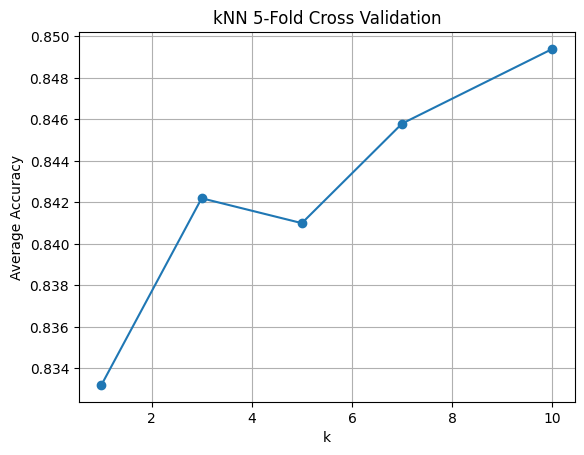

In [13]:
fig, ax = plt.subplots()
ax.plot([1, 3, 5, 7, 10], accuracies, marker='o')
ax.set_xlabel('k')
ax.set_ylabel('Average Accuracy')
ax.set_title("kNN 5-Fold Cross Validation")
plt.grid('--')
save_name = os.path.join(fig_path, 'knn_cv.jpg')
plt.savefig(save_name)

In [48]:
idx = range(4000, 5000)
mask = np.zeros(df.shape[0], dtype=bool)
mask[idx] = True
D_train = df.iloc[~mask, 1:]
X_test, y_test = df.iloc[mask, 1:-1], df.iloc[mask, -1]

one_nn = KNN(D_train.to_numpy(), k=5)
one_nn.predict(X_test.to_numpy())

LR = LogisticRegression(D_train.to_numpy())
LR.fit(lr=1e-3, verbose=True, max_iter=2000)
LR.predict(X_test.to_numpy())

step size: 0.001


 50%|███████████████████▌                   | 1005/2000 [00:37<00:38, 25.66it/s]

loss: 0.24505593944141285


100%|███████████████████████████████████████| 2000/2000 [01:14<00:00, 26.81it/s]


loss: 0.20356391989158987


In [49]:
import operator

sorted_labels_knn = [k for k, v in sorted(zip(y_test, one_nn.confidences), reverse=True, key=operator.itemgetter(1))]

sorted_labels_lr = [k for k, v in sorted(zip(y_test, LR.confidences), reverse=True, key=operator.itemgetter(1))]

In [50]:
def ROC(labels, confidences):
    FP_curve = [0]
    TP_curve = [0]
    num_pos = np.sum(labels)
    num_neg = len(labels) - num_pos
    TP = 0
    FP = 0
    last_TP = 0
    i = 0
    while i < len(labels):
        if i > 0 and labels[i] == 0 and confidences[i] != confidences[i-1] and TP > last_TP :
            FPR = FP/num_neg
            TPR = TP/num_pos
            TP_curve.append(TPR)
            FP_curve.append(FPR)
            last_TP = TP
        if labels[i] == 1:
            TP += 1
        else:
            FP += 1
        i+=1
        
    FPR = FP/num_neg
    TPR = TP/num_pos
    TP_curve.append(TPR)
    FP_curve.append(FPR)
        
        #FPR = FP/num
    return np.array(FP_curve), np.array(TP_curve)

In [67]:
cons_knn = list(one_nn.confidences)
cons_knn.sort(reverse=True)
FP_KNN, TP_KNN = ROC(sorted_labels_knn, cons_knn)
dx_knn = FP_KNN[1:] - FP_KNN[:-1]
AUC_knn = np.sum(0.5*(TP_KNN[1:]+TP_KNN[:-1])*dx_knn)
label_knn = 'K-Nearest Neighbors (AUC = {:.2f})'.format(AUC_knn)

cons_lr = list(LR.confidences)
cons_lr.sort(reverse=True)
FP_LR, TP_LR = ROC(sorted_labels_lr, cons_lr)
dx_lr = FP_LR[1:] - FP_LR[:-1]
AUC_lr = np.sum(0.5*(TP_LR[1:]+TP_LR[:-1])*dx_lr)
label_lr = 'Logistic Regression (AUC = {:.2f})'.format(AUC_lr)

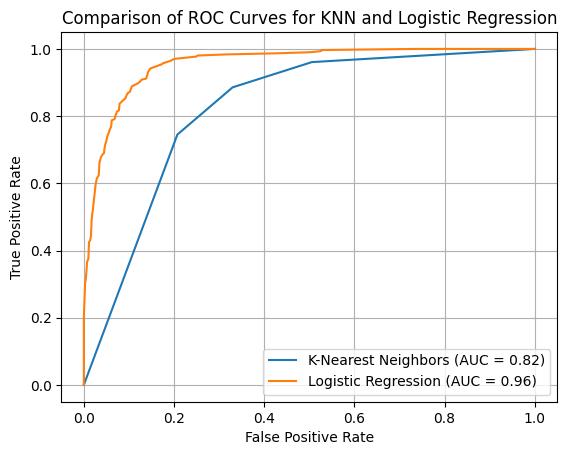

In [69]:
plt.plot(FP_KNN, TP_KNN, label=label_knn)
plt.plot(FP_LR, TP_LR, label=label_lr)

plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("Comparison of ROC Curves for KNN and Logistic Regression")
plt.grid()
plt.legend()

save_name = os.path.join(fig_path, 'roc.jpg')
plt.savefig(save_name)